In [1]:
from SAM import SAM
import numpy as np

Run SAM

In [2]:
sam=SAM()
sam.load_data('../../example_data/schisto2.5_tpm.csv.gz')
sam.preprocess_data()
sam.run()
sam.clustering(param = 4, method = 'kmeans') #kmeans with 4 clusters
sam.clustering(method = 'dbscan') #density clustering

RUNNING SAM
Iteration: 0, Convergence: 0.4153096741360165
Iteration: 1, Convergence: 0.09658108374800638
Iteration: 2, Convergence: 0.06940308430274005
Iteration: 3, Convergence: 0.01991812257359249
Iteration: 4, Convergence: 0.007846720117086195
Computing the UMAP embedding...
Elapsed time: 8.616078853607178 seconds


# Plotting with Matplotlib

The `sam.scatter` function can be used to display a scatter plot with `matplotlib`.

In [3]:
sam.adata

AnnData object with n_obs × n_vars = 338 × 10782 
    obs: 'kmeans_clusters', 'density_clusters'
    var: 'mask_genes', 'spatial_dispersions', 'weights'
    uns: 'preprocess_args', 'ranked_genes', 'pca_obj', 'X_processed', 'neighbors', 'run_args'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_disp', 'X_knn_avg'

In [4]:
sam.scatter()

By default, the UMAP projection is displayed if it is available. Otherwise, one of the other keys in `sam.adata.obsm` will be selected for display. We can use the `projection` argument of scatter to pass in a key string from `sam.adata.obsm` or a 2D numpy array:

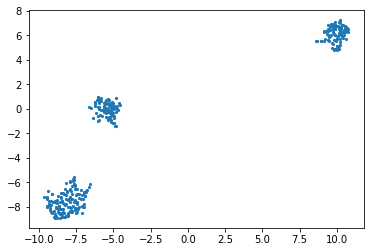

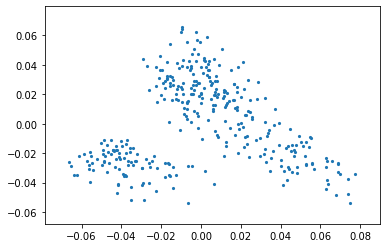

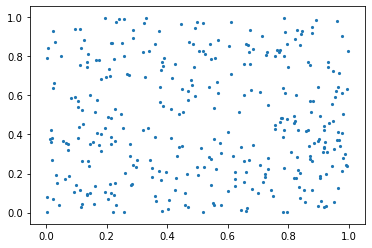

In [5]:
sam.scatter(projection = 'X_umap')
sam.scatter(projection = 'X_pca')
sam.scatter(projection = np.random.rand(sam.adata.shape[0],2));

`sam.scatter` returns the matplotlib axes, which can be used to manipulate the scatter plot:

Text(0, 0.5, 'Dim 2')

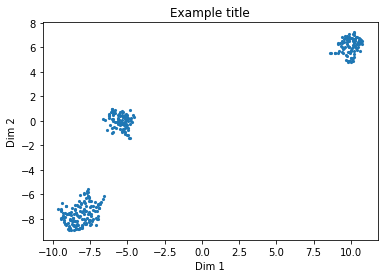

In [6]:
ax = sam.scatter()

ax.set_title('Example title')
ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')

The `c` argument can be a string indicating a color (`c='black'`), a numpy array of floats, or a string indicating an element in the `obs` attribute of the `AnnData` object.

In [7]:
sam.adata

AnnData object with n_obs × n_vars = 338 × 10782 
    obs: 'kmeans_clusters', 'density_clusters'
    var: 'mask_genes', 'spatial_dispersions', 'weights'
    uns: 'preprocess_args', 'ranked_genes', 'pca_obj', 'X_processed', 'neighbors', 'run_args'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_disp', 'X_knn_avg'

 For example, `c` can be `'kmeans_clusters'` or `'density_clusters'` to overlay cluster assignments. 
 
 Also, the `SAM.scatter` function can accept all styling arguments that are available to the `matplotlib.pyplot.scatter` function.
 
 The `colorbar` argument can be set to `False` to not display a colorbar.

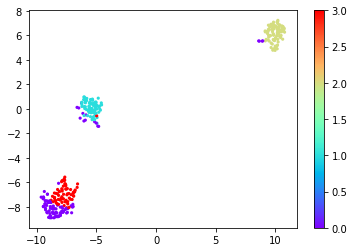

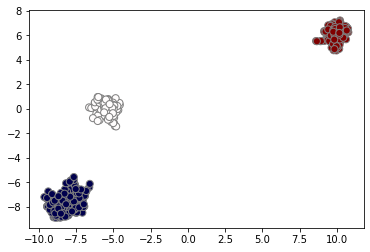

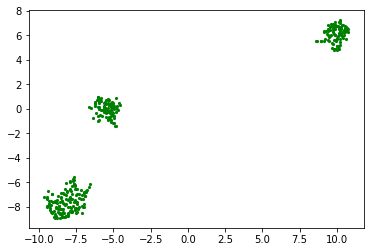

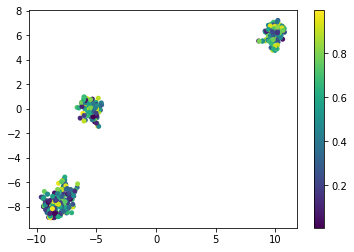

In [8]:
sam.scatter(c = 'kmeans_clusters');
sam.scatter(c = 'density_clusters', linewidth = 1, s = 50, edgecolor='gray', cmap = 'seismic', colorbar=False);
sam.scatter(c = 'green') #green points
sam.scatter(c = np.random.rand(sam.adata.shape[0]), cmap='viridis',s = 25); #if we want to overlay an arbitrary vector of numbers

To show a particular gene expression, we can use `sam.show_gene_expression`. The first argument is the gene ID. The `avg` argument controls whether the gene expressions are averaged with their neighbors are not. Averaging the gene expressions will result in 'cleaner' looking expression patterns. If you wish to see the unsmoothed expression values, set `avg=False`.

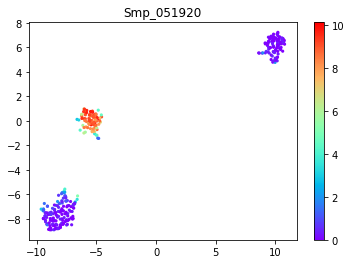

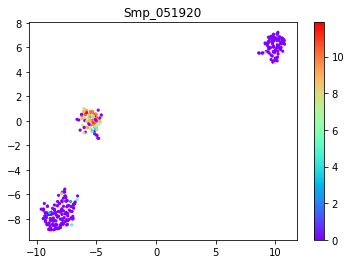

In [9]:
sam.show_gene_expression('Smp_051920', avg=True); #avg=True by default
sam.show_gene_expression('Smp_051920', avg=False); #avg=True by default

`sam.show_gene_expression` accepts all arguments that are available to `sam.scatter` (like `projection` or the matplotlib styling parameters). 

`sam.show_gene_expression` returns the matplotlib axes containing the scatter plot and a numpy array of the gene expression values it overlaid.

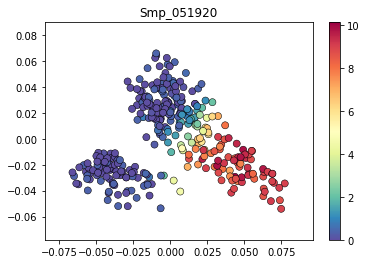

In [10]:
axes,values = sam.show_gene_expression('Smp_051920', projection = 'X_pca', cmap = 'Spectral_r', linewidth=0.5,edgecolor='k',s=50);

In [11]:
print(values[:20]) #displayed expression values for the first 20 cells
print(axes) #the matplotlib axes containing the above scatter plot

[0.         0.         6.99957924 1.00561657 0.78994823 0.72260358
 0.         0.40807438 0.39908621 0.         0.         0.39908621
 8.49771705 0.36546397 0.         2.88452915 0.24378564 6.99044433
 8.01817386 8.7641082 ]
AxesSubplot(0.125,0.125;0.62x0.755)


Finally, you can pass in existing matplotlib axes into the `axes` argument of `sam.show_gene_expression` and `sam.scatter` to draw the output onto existing axes. This is useful for drawing multiple plots in the same figure:

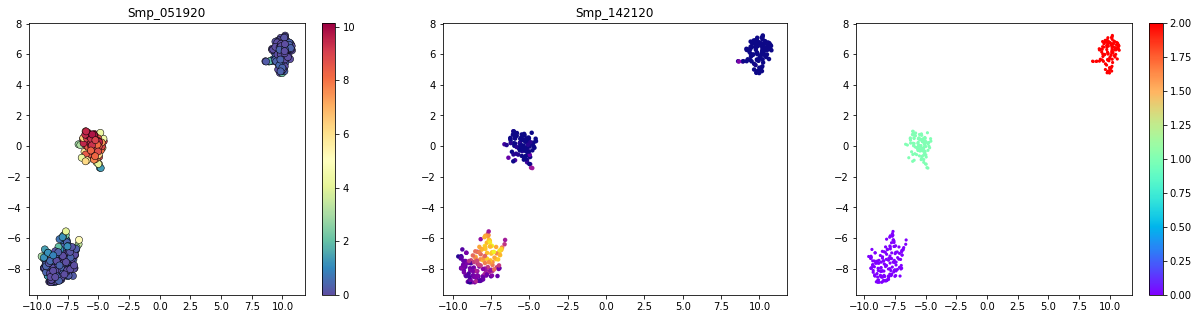

In [12]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,3)
fig.set_size_inches((21,5))
sam.show_gene_expression('Smp_051920', axes = axs[0], cmap = 'Spectral_r', linewidth=0.5,edgecolor='k',s=50);
sam.show_gene_expression('Smp_142120', axes = axs[1], cmap = 'plasma', s=20, colorbar = False);
sam.scatter(c='density_clusters', axes = axs[2]);

# Plotting with the interactive GUI

In [13]:
from SAMGUI import SAMGUI

If using a Jupyter notebook with all prerequisites installed (see the Github README), we can interactively explore the SAM results and run all the analysis using the `SAMGUI.py` module.

We can pass in an our existing SAM object to `SAMGUI`:

In [14]:
gui_obj = SAMGUI(sam)

`gui_obj` now stores the states of all the `ipythonwidgets` used to interact with the data. To display the GUI, run:

In [15]:
gui_obj.SamPlot

    'data': [{'hoverinfo': 'text',
              'marker': {'size'…

This GUI utilizes the `FigureWidget` class in the `plotly` package to embed a `plotly` graph into an `ipythonwidget` container. 

On the left, you should see an interactive scatter plot. On the right, you should see a control panel with 4 tabs. This control panel lets you manipulate the scatter plot to display gene expressions and cluster annotations, select specific cells, subcluster those cells, preprocess the data / run SAM with different parameters, identify marker genes, compute cluster assignments, manually annotate selected cells, find genes with similar expression patterns, etc.

## The 'Interact' tab
Hover over the labels and buttons to see a tooltip explaining what they do. Below, I describe some important features of this control panel in more detail.

### Selecting cells

Initially, all cells are selected. To unselect all cells, click the "Unselect all" button. Or, press `x` while the mouse is hovering over the scatter plot to unselect all cells (hover over the `ReadMe` button to see a list of other hotkeys). Unselected cells should be grayed out / sent to the background. You can now click and drag a rectangle around cells you wish to select.

### Showing gene expressions

Type in a gene ID (i.e. `Smp_005350`) in the 'Show expressions' textbox and press Enter.

While gene expressions are being shown, you can use the 'Threshold expr' slider to select all cells with greater than a certain expression value.

### Finding marker genes for a subset of cells

Once you've selected a subset of cells, click the 'Find markers (RF)' button. This will find marker genes for the selected cells using a random forest classifier.


Use the left/right arrow keys while your mouse is hovering over the scatter plot to scroll through the ranked genes. You can also use the `Ranked genes` slider. If marker genes have not been calcualted, the genes are initially ranked by their SAM weights.

### Calculating cluster assignments

In the dropdown menu next to the 'Cluster' button, select a clustering algorithm. Leiden, Louvain, and Hdbscan algorithms require that their dependencies be installed (see the README). To compute cluster assignments, click the 'Cluster' button.

To overlay the cluster assignments, use the left dropdown menu next to 'Disp obs ann'. This dropdown menu contains all keys currently stored in the `sam.adata.obs` attribute. Select a key, and click the 'Disp obs ann' button. The scatter plot on the left should update.

### Selecting specific clusters

Hovering the mouse over a cell in the scatter plot with annotations overlaid will show its label. Clicking on this cell will unselect / select all cells sharing its label.

You can also use the RIGHT dropdown menu next to 'Disp obs ann'. Selecting a label from this dropdown menu will unselect / select all cells with that label.

### Manually annotating cells

1) Select a subset of cells. 

2) In the left text box, type in the key you wish to modify in the `sam.adata.obs` attribute. If the key does not exist, a new one is created.

3) In the right text box, type in the label for the selected cells and press enter.

4) In the 'Disp obs ann' dropdown menu, overlay the newly created annotations.

## The 'Run' tab: Running SAM & subclustering

In the `Run` tab, you can run SAM on the currently selected cells. If all cells are selected, the current scatter plot is updated. If a subset of cells are selected, SAM will be run only on the subset and a new scatter plot tab will be created. 

Clicking the `Run SAM` button will run SAM on the selected cells. The label for the new scatter plot tab will be taken from the textbox on the right of the `Run SAM` button.

The SAM output will be written to the `Output` tab in the control panel.

## The 'Preprocess' tab

The `Preprocess` tab lets you control how the data will be preprocessed prior to running SAM.

You can also use the 'Load data' button to load in new data (from a csv file, an existing AnnData object (.h5ad), a Pickle file generated by `sam.save`, etc).

'Load annotations' will load annotations into the `obs` attribute of `sam.adata`.

## Important SAMGUI attributes

`gui_obj.sams` : A list of SAM objects currently displayed in the scatter plot tabs. The length of the list is the number of open scatter plot tabs.

`gui_obj.current_tab` : The index of the currently displayed scatter plot tab.

`gui_obj.current_sam` : The SAM object corresponding to the currently displayed scatter plot tab.

# Using the GUI for end-to-end analysis

Finally, we can also run the GUI without loading an existing SAM object:

In [16]:
gui_obj = SAMGUI()
gui_obj.SamPlot

    'data': [{'type': 'scattergl', 'uid': '737e313c-40a2-418c-ae23…

Enter `../../example_data/schisto2.5_tpm.csv.gz` into the textbox and click `Load data`. You can then click `Run SAM` to run SAM on the loaded data using the currently selected data preprocessing and run parameters.